In [242]:
# useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import LabelEncoder  # Onehot Encoding
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [283]:
# load dataset
df = pd.read_csv("data/loan_set_data.csv")
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [244]:
# gather information from the data
display(df.shape)
print(100*"=")
display(df.info())
print(100*"=")
display(df.isnull().sum())

(614, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


None

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [245]:
# check duplicates
df.duplicated().sum()

0

In [281]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [246]:
# Load id column 
df.drop(['Loan_ID'],axis=1,inplace=True)

In [277]:
# seprate catagorical and numerical cols
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(exclude='object').columns
print(categorical_cols)
print(numerical_cols)


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


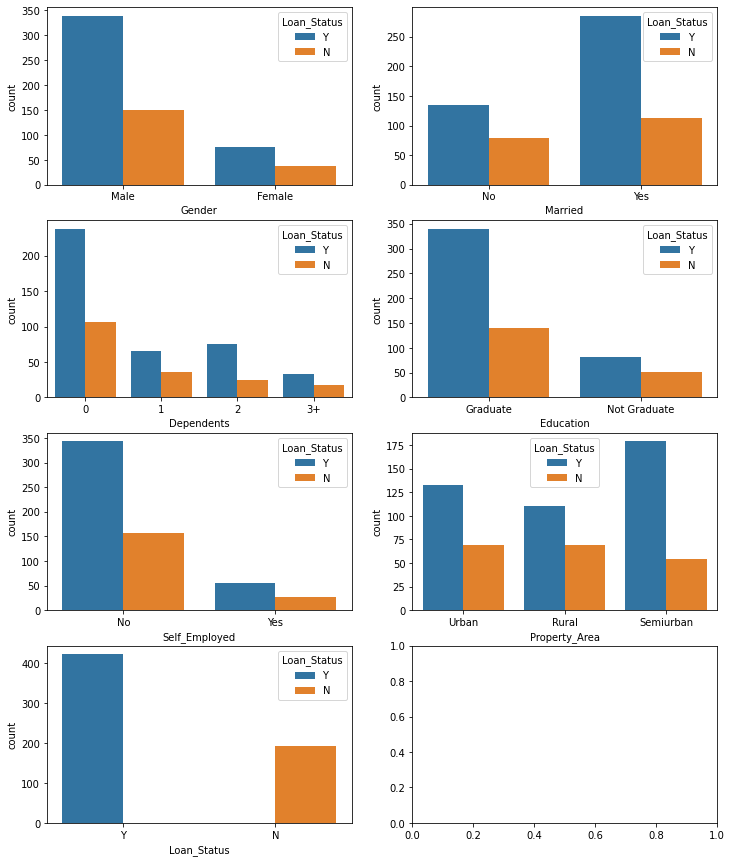

In [278]:
## catogorical data analysis with loan_status
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_cols):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])

In [279]:
# numerical data analysis with loan_status
print(numerical_cols)

## encode the loan_status for numerical analysis
encoder = LabelEncoder()
df['Status'] = encoder.fit_transform(df['Loan_Status'])

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


<AxesSubplot:>

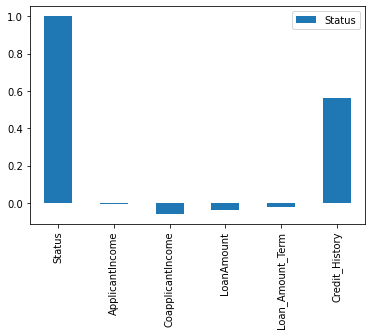

In [250]:
num_cols = ['Status','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
new_df = df[num_cols]

#plotting relation between correlation and rideshare_new dataframe
correlation=new_df.corr()[['Status']]
status_corr=correlation[(correlation['Status']>0.0001)|(correlation['Status']<-0.0001)] #OR
status_corr.plot.bar() 

<AxesSubplot:>

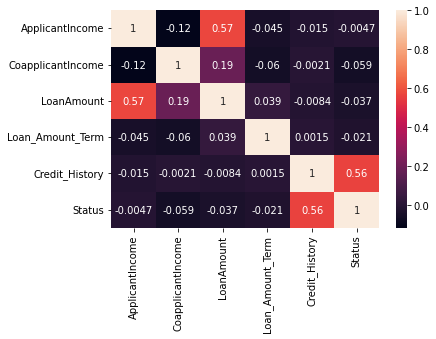

In [251]:
## correlation
sns.heatmap(df.corr(),annot=True)

In [252]:
## drop status
df.drop(['Status'],axis=1,inplace=True)

Preprocess the data

In [253]:
## handle missing values of numerical columns
num_df = df[numerical_cols]
imputer = SimpleImputer(strategy='mean')
num_df = pd.DataFrame(imputer.fit_transform(num_df),columns=numerical_cols)

## encode the catogorical values
cat_df = df[categorical_cols]
encoder = LabelEncoder()
for col in categorical_cols:
    cat_df[col] = encoder.fit_transform(cat_df[col])

In [254]:
## handle missing values of catogorical columns


imputer =  SimpleImputer(strategy="mean")
cat_df = pd.DataFrame(imputer.fit_transform(cat_df),columns = categorical_cols)

In [255]:
display(num_df.head())
display(cat_df.head())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,146.412162,360.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0
2,3000.0,0.0,66.000000,360.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,2.0,1.0


In [260]:
## join both data
new_df = pd.concat([num_df,cat_df],axis=1)
new_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849.0,0.0,146.412162,360.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,3000.0,0.0,66.000000,360.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0


Build the model

In [256]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [262]:
## split dependent and independent feature

X = new_df.drop(columns='Loan_Status',axis=1)
y = new_df['Loan_Status']

In [263]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [264]:
## apply Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [265]:
rf_prediction = rf_model.predict(X_test)

In [266]:
accuracy_score(y_test,rf_prediction)


0.7642276422764228

In [267]:
## apply Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [268]:
dt_prediction = dt_model.predict(X_test)
accuracy_score(y_test,dt_prediction)

0.6991869918699187

In [269]:
## apply Logestic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)


LogisticRegression()

In [270]:
lr_prediction = lr_model.predict(X_test)
accuracy_score(y_test,lr_prediction)

0.7886178861788617

In [271]:
## apply xgboost

import xgboost as xgb

xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [272]:
xgb_prediction = xgb_cl.predict(X_test)
accuracy_score(y_test,xgb_prediction)

0.7560975609756098

In [274]:
from sklearn.model_selection import RandomizedSearchCV
model = RandomForestClassifier()
cv=RandomizedSearchCV(model,param_distributions=params,scoring='accuracy',cv=5,verbose=3)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..criterion=gini, max_depth=3, n_estimators=200; total time=   0.3s
[CV 2/5] END ..criterion=gini, max_depth=3, n_estimators=200; total time=   0.3s
[CV 3/5] END ..criterion=gini, max_depth=3, n_estimators=200; total time=   0.2s
[CV 4/5] END ..criterion=gini, max_depth=3, n_estimators=200; total time=   0.2s
[CV 5/5] END ..criterion=gini, max_depth=3, n_estimators=200; total time=   0.2s
[CV 1/5] END ..criterion=gini, max_depth=5, n_estimators=100; total time=   0.1s
[CV 2/5] END ..criterion=gini, max_depth=5, n_estimators=100; total time=   0.0s
[CV 3/5] END ..criterion=gini, max_depth=5, n_estimators=100; total time=   0.1s
[CV 4/5] END ..criterion=gini, max_depth=5, n_estimators=100; total time=   0.1s
[CV 5/5] END ..criterion=gini, max_depth=5, n_estimators=100; total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=3, n_estimators=200; total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=3, n_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   scoring='accuracy', verbose=3)

In [275]:
cv.best_params_

{'n_estimators': 50, 'max_depth': 3, 'criterion': 'gini'}

In [276]:
# model training with best suitable hyper-tuned parameters

bestmodel=RandomForestClassifier(n_estimators=100,max_depth=5,criterion='gini',oob_score=True)
bestmodel.fit(X_train,y_train)
y_pred=bestmodel.predict(X_test)
best_accuracy=(accuracy_score(y_test,y_pred)*100,2)
print(best_accuracy)

(78.04878048780488, 2)


In [282]:
#### Encoding categrical Features: ##########
train_df_encoded = pd.get_dummies(df,drop_first=True)
train_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Columns: 628 entries, ApplicantIncome to Loan_Status_Y
dtypes: float64(4), int64(1), uint8(623)
memory usage: 397.7 KB


In [216]:
########## Split Features and Target Varible ############
X = train_df_encoded.drop(columns='Loan_Status_Y')
y = train_df_encoded['Loan_Status_Y']

################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)
############### Handling/Imputing Missing values #############
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

In [217]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6455152174999119
Validation Mean Accuracy:  0.7128220985363842


<AxesSubplot:xlabel='Max_Depth', ylabel='Values'>

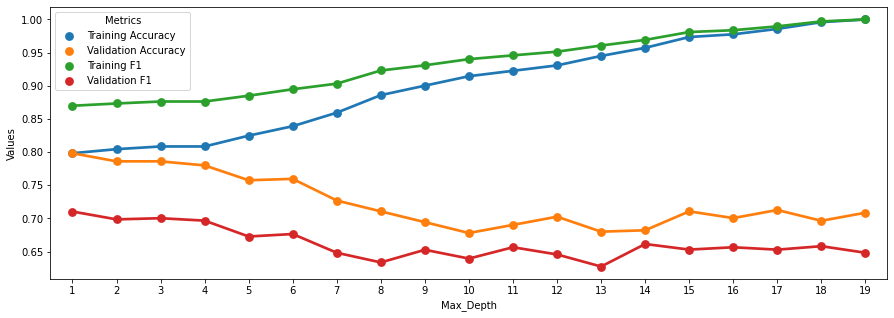

In [218]:
# We can see from above metrics that Training Accuracy > Test Accuracy with default settings of Decision Tree classifier. Hence, model is overfit. We will try some Hyper-parameter tuning and see if it helps.

# First let's try tuning 'Max_Depth' of tree

training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)

    Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

<AxesSubplot:xlabel='Min_Samples_leaf', ylabel='Values'>

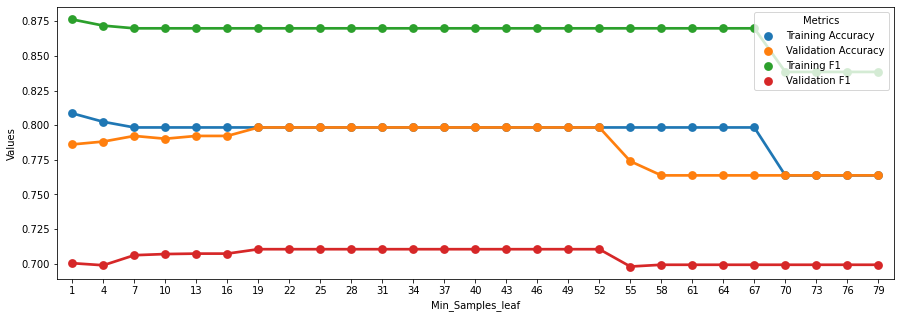

In [221]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np

for samples_leaf in range(1,80,3): ### Sweeping from 1% samples to 10% samples per leaf 
    tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [222]:
# From above plot, we will choose Min_Samples_leaf to 35 to improve test accuracy.

# Let's use this Decision Tree classifier on unseen test data and evaluate Test Accuracy, F1 Score and Confusion Matrix

from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Test Accuracy:  0.8536585365853658
Test F1 Score:  0.903225806451613
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123


In [225]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_leaf = 10)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8699080157687253
Train Accuracy  0.7983706720977597
Validation Mean F1 Score:  0.7105036634489533
Validation Mean Accuracy:  0.7983714698000413


So from analysing from *XG Boost* , *Random Forest* , *Logistic Regression* , *Decision Tree*  

*Decision Tree* gives the best test accuracy of 86%